# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regresión Lineal: Lección 3 - Covarianza y Correlación**
---

In [13]:
# Tratamiento de los datos
# ========================
import pandas as pd
import numpy as np

# Librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer preferencias de visualización
# ========================================
plt.rcParams["figure.figsize"] = (20,20)
pd.options.display.max_columns = None 

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.  

In [14]:
df = pd.read_csv("datos/soci_econ_country_profiles_resumido.csv", index_col = 0)
df.head(2)

,region,restaurant_price_index,population_2017,employment_agriculture,employment_industry,employment_services,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,consumer_price_index,human_capital_index,inflation,urban_population,population_age_distribution_0_14,population_age_distribution_60_plus,international_migrant_stock
country,,,,,,,,,,,,,,,,,,
Argentina,SouthAmerica,50.37,44271.0,2.0,24.8,73.1,5.3,139.59,58.40,37.37,52.57,112.887108,0.611,2.834056,91.749,24.9,15.4,4.8
Australia,Oceania,77.12,24451.0,2.7,21.2,76.1,5.2,176.54,101.94,57.58,80.66,115.686785,0.803,1.948647,85.904,19.0,21.0,28.2


1. Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?

La covarianza tan solo indica si la relación entre las variables sigue la misma dirección o la contratria, viendose esto en el signo de la covarianza. Si la covarianza es positiva significa que cuando aumenta el valor de una variable aumenta también el de la otra. Si la covarianza es negativa cuando aumenta el valor de una de las variables, disminuye el de la otra.  
 
En la correlación se ve lo mismo que en la covarianza pero además nos indica la fuerza de la relación entre las variables. Las relaciones más fuertes se ven en valores cercanos a -1 y 1 (-1 y 1 indican correlación perfecta), mientras que los valores cercanos a 0 indican que no hay relación entre las variables.

2. Calculad la covarianza y la correlación de nuestro dataset. No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. Calculad solo la correlación de Pearson.

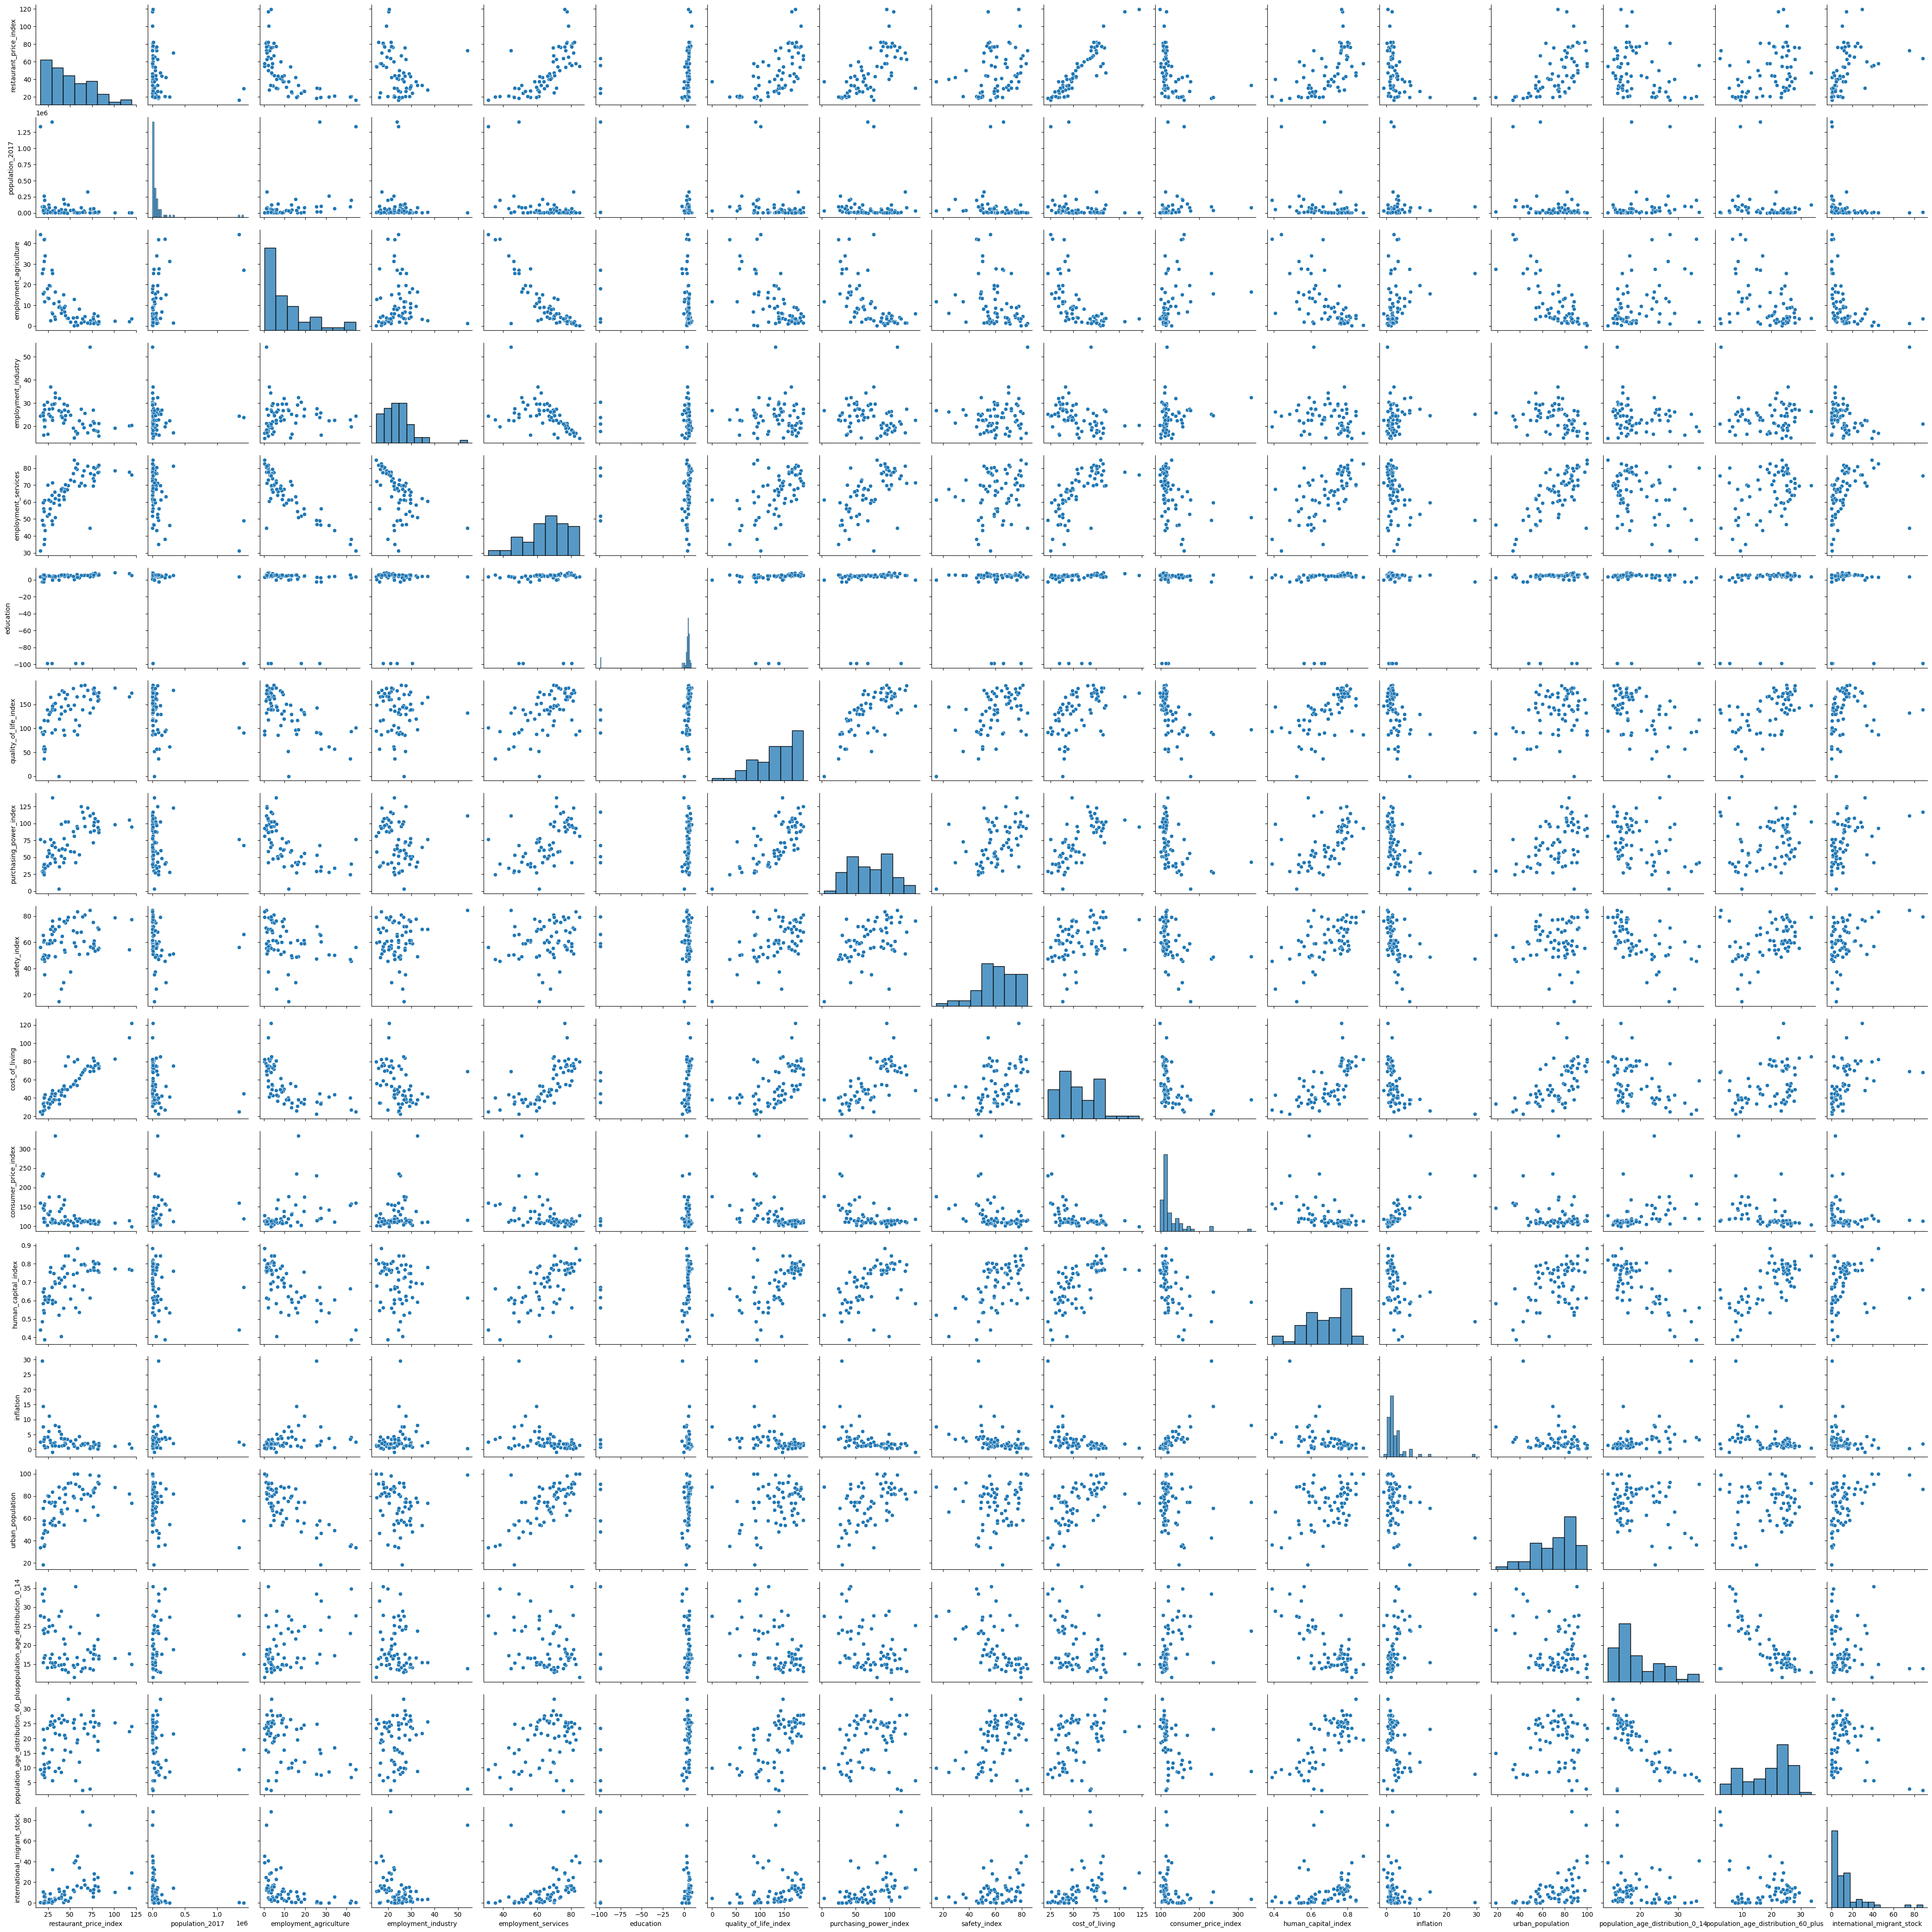

In [15]:
# separamos las variables numéricas ya que son las que vamos a analizar en este notebook
df_numericas = df.select_dtypes(include = np.number)
# sacamos primero el pairplot
sns.pairplot(df_numericas);

En el pairplot podemos ver que aunque algunas variables tienen una relación lineal la mayoría tienen una relación no lineal (apreciamos una curva más que una recta) y por eso decidimos calcular la correlación con el método 'Spearman' en lugar de 'Pearson'. Aplicamos el método a todo el dataframe porque aunque algunas relaciones sean lineales el error no será muy representativo y nos permite una interpretación más ágil de los resultados.

In [16]:
# covarianza
df_numericas.cov()

,restaurant_price_index,population_2017,employment_agriculture,employment_industry,employment_services,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,consumer_price_index,human_capital_index,inflation,urban_population,population_age_distribution_0_14,population_age_distribution_60_plus,international_migrant_stock
restaurant_price_index,6.187290e+02,-1.409137e+06,-1.825817e+02,-46.136187,2.286167e+02,5.911431e+01,6.293552e+02,493.599305,97.056507,4.805713e+02,-3.549397e+02,1.644581,-38.291984,2.559821e+02,-44.717337,64.145967,182.302295
population_2017,-1.409137e+06,5.672667e+10,1.258180e+06,-49489.814545,-1.208223e+06,-1.753494e+06,-2.310289e+06,-234202.274671,-328224.254322,-1.036174e+06,1.135997e+06,-7225.691944,7522.679030,-1.228867e+06,271990.754406,-376680.377483,-816870.019161
employment_agriculture,-1.825817e+02,1.258180e+06,1.205948e+02,1.360149,-1.219522e+02,-2.150904e+01,-2.924421e+02,-202.500448,-49.072989,-1.474145e+02,1.594966e+02,-0.806254,14.383331,-1.502375e+02,29.870373,-35.533450,-79.390825
employment_industry,-4.613619e+01,-4.948981e+04,1.360149e+00,38.376347,-3.968304e+01,3.684843e+00,-1.460244e+01,-23.946927,11.043266,-4.080189e+01,3.907619e+01,-0.116606,2.581743,-1.579182e+01,-7.146478,-3.015138,2.790783
employment_services,2.286167e+02,-1.208223e+06,-1.219522e+02,-39.683037,1.615813e+02,1.757226e+01,3.071535e+02,226.478643,38.132959,1.881214e+02,-1.985656e+02,0.922662,-16.962070,1.659383e+02,-22.761093,38.589939,76.575245
education,5.911431e+01,-1.753494e+06,-2.150904e+01,3.684843,1.757226e+01,6.218177e+02,1.236543e+02,36.677993,-27.212085,4.083283e+01,6.543694e+01,0.482332,4.652956,2.085439e+01,-10.808031,50.939083,-123.852999
quality_of_life_index,6.293552e+02,-2.310289e+06,-2.924421e+02,-14.602441,3.071535e+02,1.236543e+02,1.772999e+03,894.103497,299.492861,4.614750e+02,-7.538423e+02,2.844495,-64.876883,2.175842e+02,-118.741599,187.357699,111.566813
purchasing_power_index,4.935993e+02,-2.342023e+05,-2.025004e+02,-23.946927,2.264786e+02,3.667799e+01,8.941035e+02,898.061585,196.433878,4.374981e+02,-5.128129e+02,1.867166,-58.746578,2.481094e+02,-62.949651,53.774736,231.253204
safety_index,9.705651e+01,-3.282243e+05,-4.907299e+01,11.043266,3.813296e+01,-2.721208e+01,2.994929e+02,196.433878,200.519340,1.058037e+02,-2.110016e+02,0.914972,-21.652392,2.726022e+01,-47.405461,41.870822,95.142120
cost_of_living,4.805713e+02,-1.036174e+06,-1.474145e+02,-40.801891,1.881214e+02,4.083283e+01,4.614750e+02,437.498062,105.803712,4.368209e+02,-3.443056e+02,1.571506,-39.204000,2.146246e+02,-46.277554,57.485407,157.933327


Las variables que tienen covarianza negativa están inversamente relacionadas (cuando una aumenta la otra disminuye) y las que tienen el signo positivo están directamente relacionadas (si una aumenta la otra también). Por ejemplo, 'population_2017' y 'employment_industry' están inversamente relacionadas, por lo que al aumentar la población baja el porcentaje de empleo en sector industria. Sin embargo, 'education' y 'employment_industry' están directamente relacionadas, por lo que al aumentar el gasto en educación aumenta también el porcentaje de empleo del sector industria.

In [17]:
# correlacion de Spearman
correl = df_numericas.corr(method='spearman')
correl

,restaurant_price_index,population_2017,employment_agriculture,employment_industry,employment_services,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,consumer_price_index,human_capital_index,inflation,urban_population,population_age_distribution_0_14,population_age_distribution_60_plus,international_migrant_stock
restaurant_price_index,1.000000,-0.358463,-0.814898,-0.428786,0.823010,0.500439,0.685322,0.722563,0.311216,0.911919,-0.512457,0.670355,-0.490789,0.659193,-0.275626,0.357404,0.719745
population_2017,-0.358463,1.000000,0.343351,-0.058540,-0.279261,-0.150197,-0.359775,-0.207390,-0.501957,-0.281161,0.472999,-0.309915,0.414967,-0.137377,0.389022,-0.301389,-0.507871
employment_agriculture,-0.814898,0.343351,1.000000,0.275443,-0.828677,-0.375564,-0.579413,-0.714177,-0.384672,-0.783302,0.456925,-0.656534,0.430661,-0.708130,0.339598,-0.340140,-0.715910
employment_industry,-0.428786,-0.058540,0.275443,1.000000,-0.644879,-0.195554,-0.138167,-0.249611,0.069794,-0.457133,0.139169,-0.225703,0.206562,-0.360683,-0.215993,0.107590,-0.341814
employment_services,0.823010,-0.279261,-0.828677,-0.644879,1.000000,0.427612,0.585389,0.649374,0.237636,0.796342,-0.471405,0.640950,-0.397921,0.692741,-0.182060,0.307278,0.681874
education,0.500439,-0.150197,-0.375564,-0.195554,0.427612,1.000000,0.561661,0.403255,-0.058638,0.412572,-0.239062,0.485283,-0.077459,0.225872,-0.011261,0.339973,0.217870
quality_of_life_index,0.685322,-0.359775,-0.579413,-0.138167,0.585389,0.561661,1.000000,0.715771,0.444342,0.600250,-0.673938,0.667342,-0.485398,0.217662,-0.413533,0.611025,0.463088
purchasing_power_index,0.722563,-0.207390,-0.714177,-0.249611,0.649374,0.403255,0.715771,1.000000,0.446618,0.741572,-0.494166,0.636738,-0.573155,0.459644,-0.316930,0.248698,0.596309
safety_index,0.311216,-0.501957,-0.384672,0.069794,0.237636,-0.058638,0.444342,0.446618,1.000000,0.358317,-0.443779,0.516460,-0.571909,0.136335,-0.637646,0.397904,0.388820
cost_of_living,0.911919,-0.281161,-0.783302,-0.457133,0.796342,0.412572,0.600250,0.741572,0.358317,1.000000,-0.546436,0.728068,-0.591942,0.632049,-0.338184,0.356043,0.655455


En la tabla de correlación no solo podemos analizar el signo (dirección de la relación) sino también el valor (fuerza de esa relación). No obstante, es mucho más amigable analizar estos resultados con la ayuda de un heatmap, que da la misma información que esta tabla. Es por ello que realizamos la interpretación de la correlación en el siguiente ejercicio.

3. Con los resultados de la correlación del ejercicio anterior, cread un heatmap.

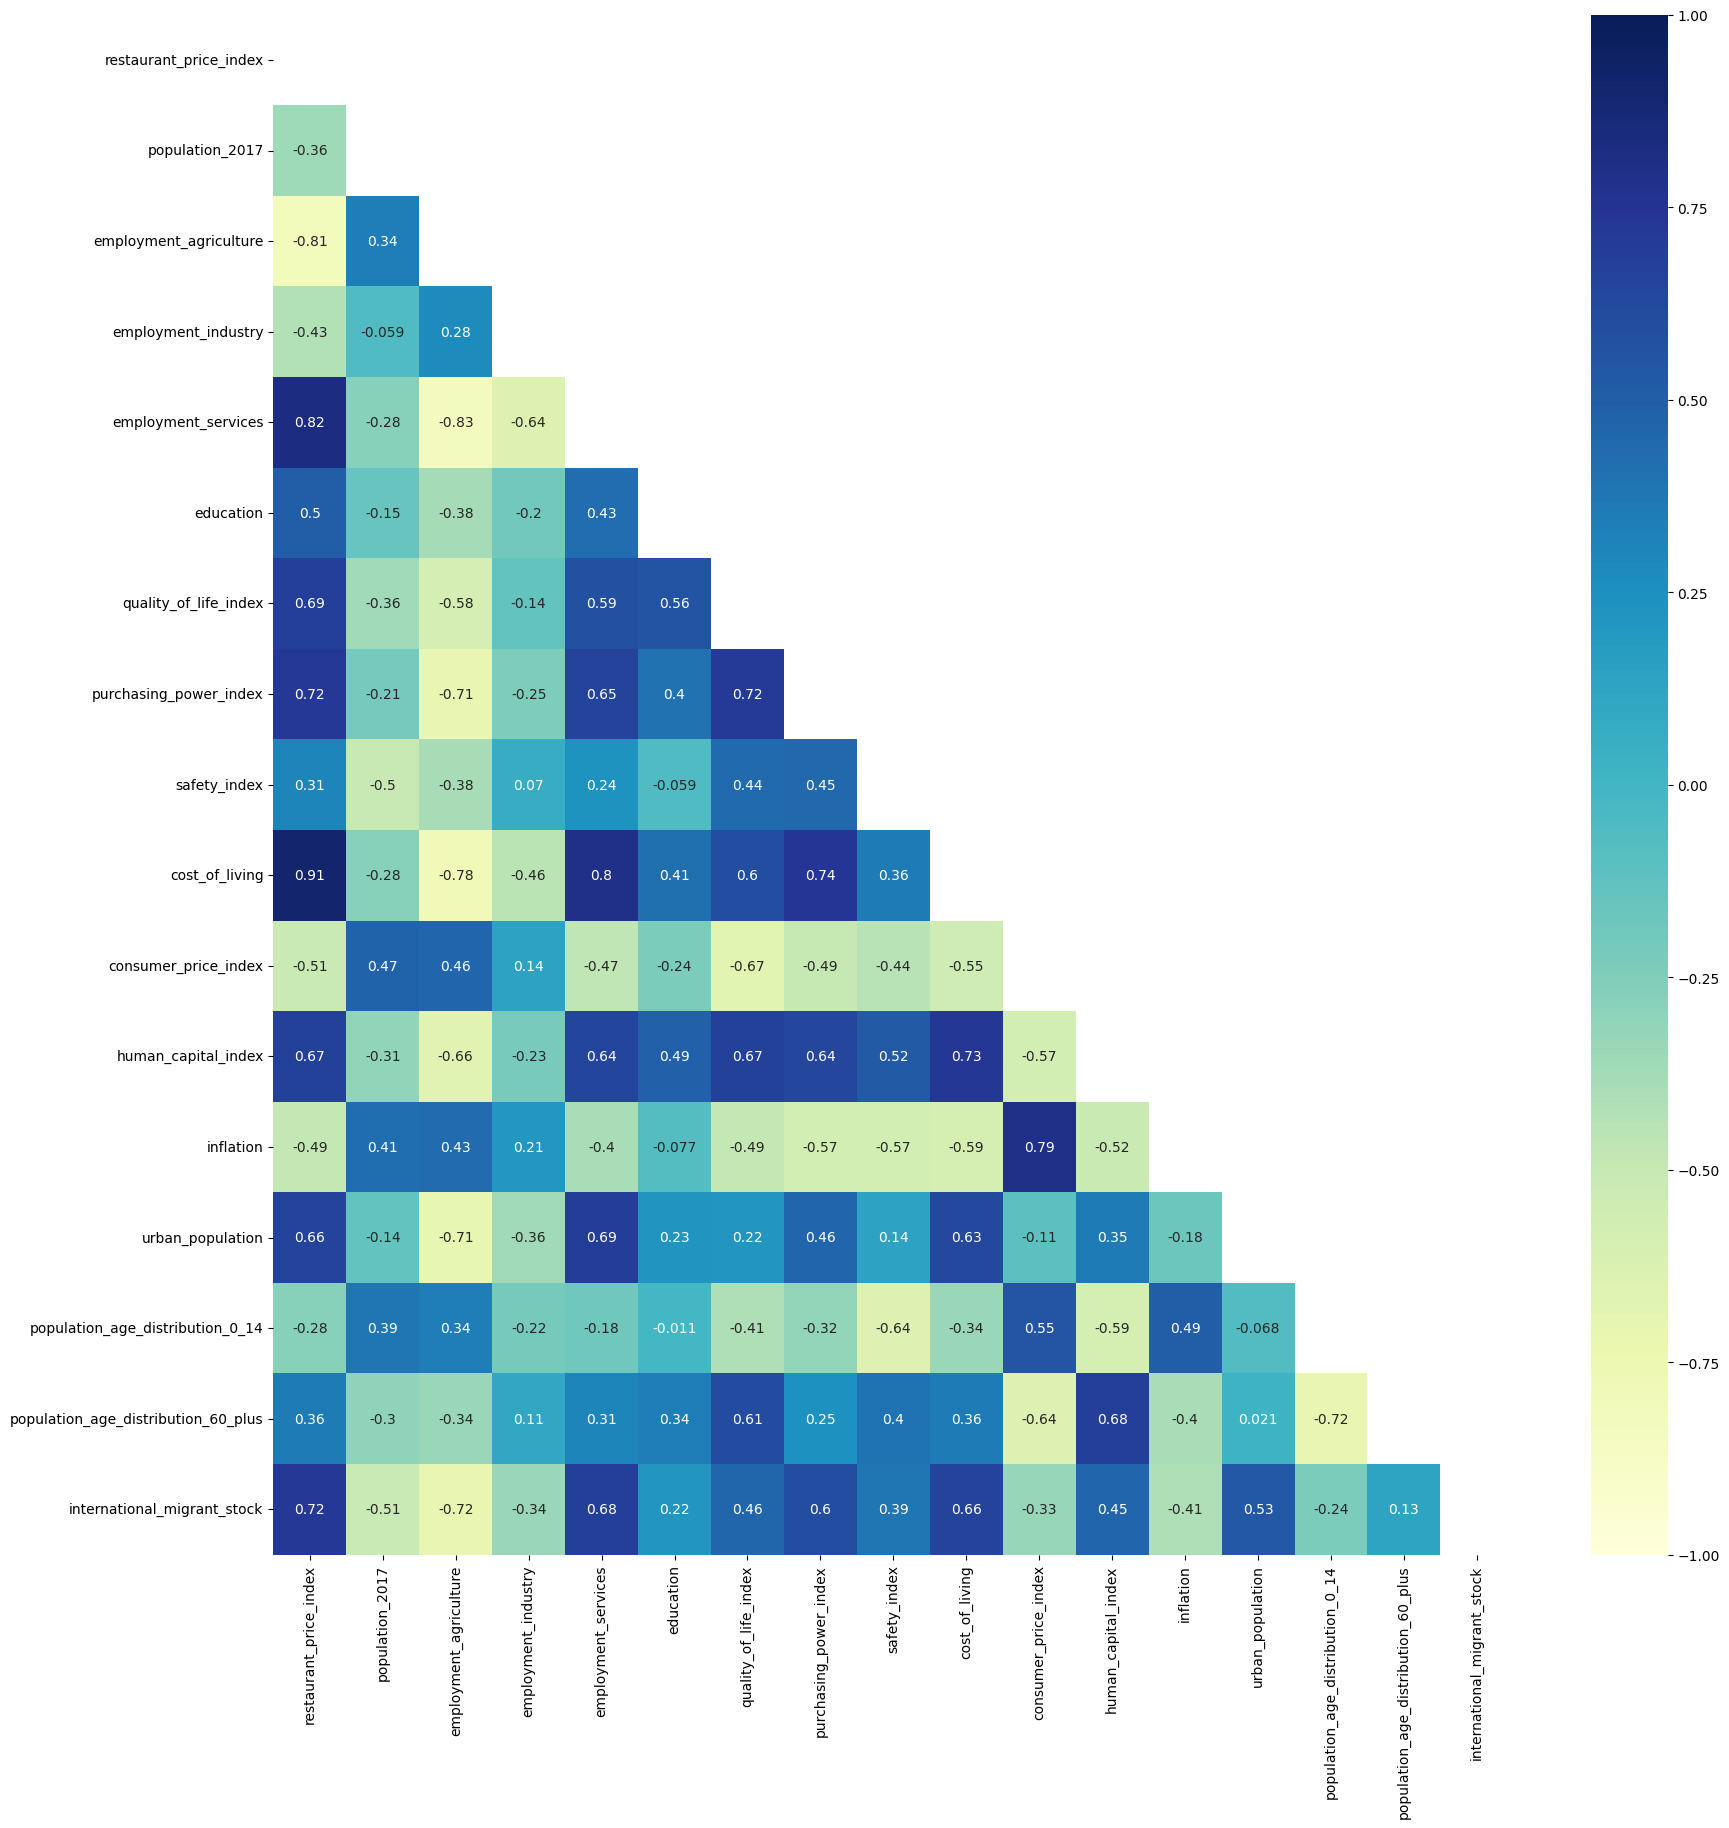

In [18]:
# sacamos el heatmap con una máscara para no tener valores repetidos
mask = np.triu(np.ones_like(correl, dtype = np.bool_))

sns.heatmap(correl, 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True,
           vmin= -1,
           vmax= 1)

plt.savefig('datos/heatmap.jpeg'); # guardamos la imagen 

- Como vemos la variable respuesta tiene una correlación ***positiva*** con las siguientes columnas:
    - correlación **muy alta** con las columnas `cost_of_living` y `employment_services`
    - correlación **alta** con `quality_of_life_index`, `purchasing_power_index`, `international_migrant_stock`, `urban_population` y `human_capital_index`
    - correlación **moderada** con la columna `education`
    - correlación **baja** con la columna `safety_index` y `population_age_distribution_60_plus`
- También tiene una correlación negativa con las siguientes columnas:
    - correlación **muy alta** con `employment_agriculture`
    - correlación **moderada** con `employment_industry`, `inflation` y `consumer_price_index`
    - correlación **baja** con `population_2017` y `population_age_distribution_0_14`

4. Guardad la gráfica del heatmap.

- Se ha incluido el código para guardarlo en el ejecicio anterior